In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np

import csv

In [2]:
def write_rows_on_csv(ticker, value, pred, move):
    with open("output.csv", "a", newline="") as file:
        writer = csv.writer(file)

        # Write new rows to the CSV file
        new_rows = [[ticker, value, pred, move]]
        writer.writerows(new_rows)

In [60]:
def get_best_degree(X, y):
    r2A_hist = []
    r2_hist = []
    degrees = []

    n = len(X)
    k = 1

    for num in range(2, 15):
        hist_poly_reg = PolynomialFeatures(degree=num)

        hist_X_poly = hist_poly_reg.fit_transform(X)

        hist_poly_lin_reg = LinearRegression()
        hist_poly_lin_reg.fit(hist_X_poly, y)

        r2 = r2_score(y, hist_poly_lin_reg.predict(hist_X_poly))
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

        r2_hist.append(r2)
        r2A_hist.append(adj_r2)
        degrees.append(num)

    return degrees[r2A_hist.index(max(r2A_hist))]

In [72]:
def train_regression(ticker, days_ahead, train_set_length):
    test_set_length = 40
    predict_day = days_ahead + train_set_length

    dataset_path = f"data/{ticker}.SAO.csv"
    df = pd.read_csv(dataset_path)

    y = df.iloc[test_set_length : test_set_length + train_set_length, 3:4].values
    X = np.array([[i for i in reversed(range(len(y)))]]).reshape(-1, 1)

    fX = np.array(
        [
            [
                i
                for i in reversed(
                    range(train_set_length, train_set_length + test_set_length)
                )
            ]
        ]
    ).reshape(-1, 1)
    fy = df.iloc[0:test_set_length, 3:4].values

    degree = get_best_degree(X, y)

    poly_reg = PolynomialFeatures(degree)

    X_poly = poly_reg.fit_transform(X)
    fX_poly = poly_reg.fit_transform(fX)
    pX_poly = poly_reg.fit_transform([[predict_day]])
    # print(fX)

    poly_lin_reg = LinearRegression()
    poly_lin_reg.fit(X_poly, y)

    y_pred = poly_lin_reg.predict(X_poly)
    fy_pred = poly_lin_reg.predict(fX_poly)
    py_pred = poly_lin_reg.predict(pX_poly)

    # write_rows_on_csv(ticker, value = )

    move = not((fy[-days_ahead][0] > y_pred[0][0]) ^ (py_pred[0][0] > y_pred[0][0]))
    
    write_rows_on_csv(ticker, value=fy[-days_ahead][0],pred=py_pred[0][0],move=move)

    # print(py_pred[0][0])
    
    # plt.figure(figsize=(10, 5))

    # plt.scatter(X, y, color="red", s=6)
    # plt.scatter(fX, fy, color="red", s=6)
    # plt.plot(X, y_pred, color="blue")
    # # plt.plot(fX, fy_pred, color="grey")

    # plt.scatter([[predict_day]], py_pred, color="orange", s=8)
    # plt.scatter(fX[-30], fy[-days_ahead][0], color="black", s=8)


    # plt.grid(color="grey", linestyle="-", linewidth=0.5)

    # plt.title("Polynomial Regression")
    # plt.xlabel("date")
    # plt.ylabel("price")
    
    
    # print(
    #     f"val: {fy[-days_ahead][0]} pred: {py_pred[0][0]} move: {move} lPred: {move}"
    # )
    # print(not((fy[-days_ahead][0] > y_pred[0][0]) ^ (py_pred[0][0] > y_pred[0][0])))
    # print(fy[-days_ahead][0])
    # print(y_pred[0][0])
    # print(py_pred[0][0])
    # print((fy[-days_ahead][0] > y_pred[0][0]))
    # print((py_pred[0][0] > y_pred[0][0]))
    # print(not(True ^ True))


val: 17.94 pred: 46.638298045256434 move: False lPred: False
False


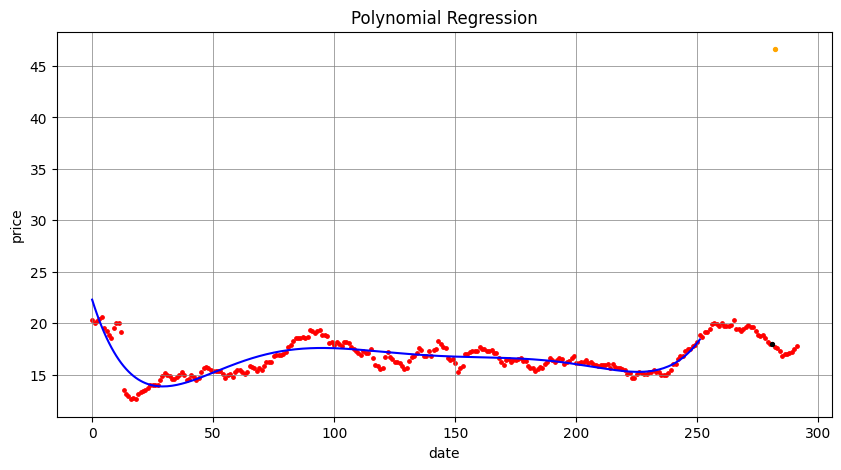

In [59]:
train_regression(ticker ='CMIG3', days_ahead=30)

In [101]:
tickers_df = pd.read_csv("results.csv")

with open("output.csv", mode="w", newline="") as file:
    writer = csv.writer(file)

    # write header
    writer.writerow(["ticker", "value", "pred", "move"])
    
for index, row in tickers_df.iterrows():
    # write_rows_on_csv(ticker=row['ticker'], value = index, pred = 1)
    if(row['label'] == 4):
        train_regression(ticker=row['ticker'], days_ahead=30, train_set_length=90)

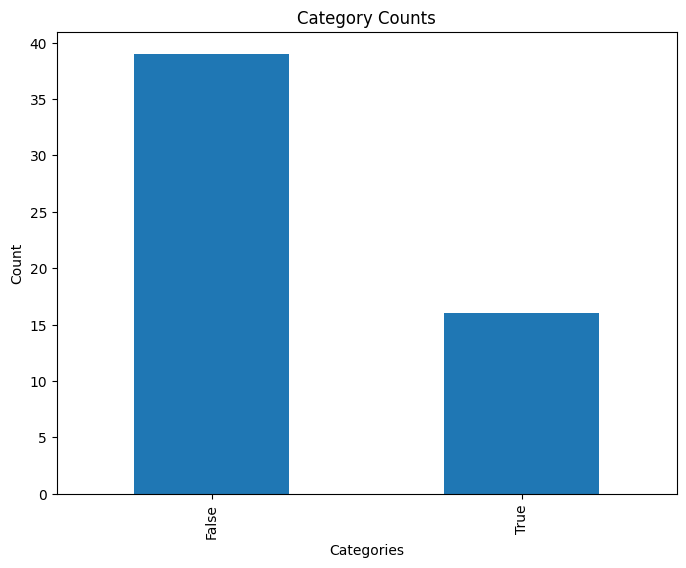

In [102]:
# Read the CSV file
df = pd.read_csv('output.csv')

# Replace 'your_column' with the actual column name in your CSV file
category_counts = df['move'].value_counts()

# Plot the chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Category Counts')
plt.show()
